In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [2]:
database = r"C:\Users\Ivo\Desktop\machine learning projects\housing prediction\housing.csv"

In [3]:
df = pd.read_csv(database,delimiter=',')

In [87]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
dtype: int64

In [4]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


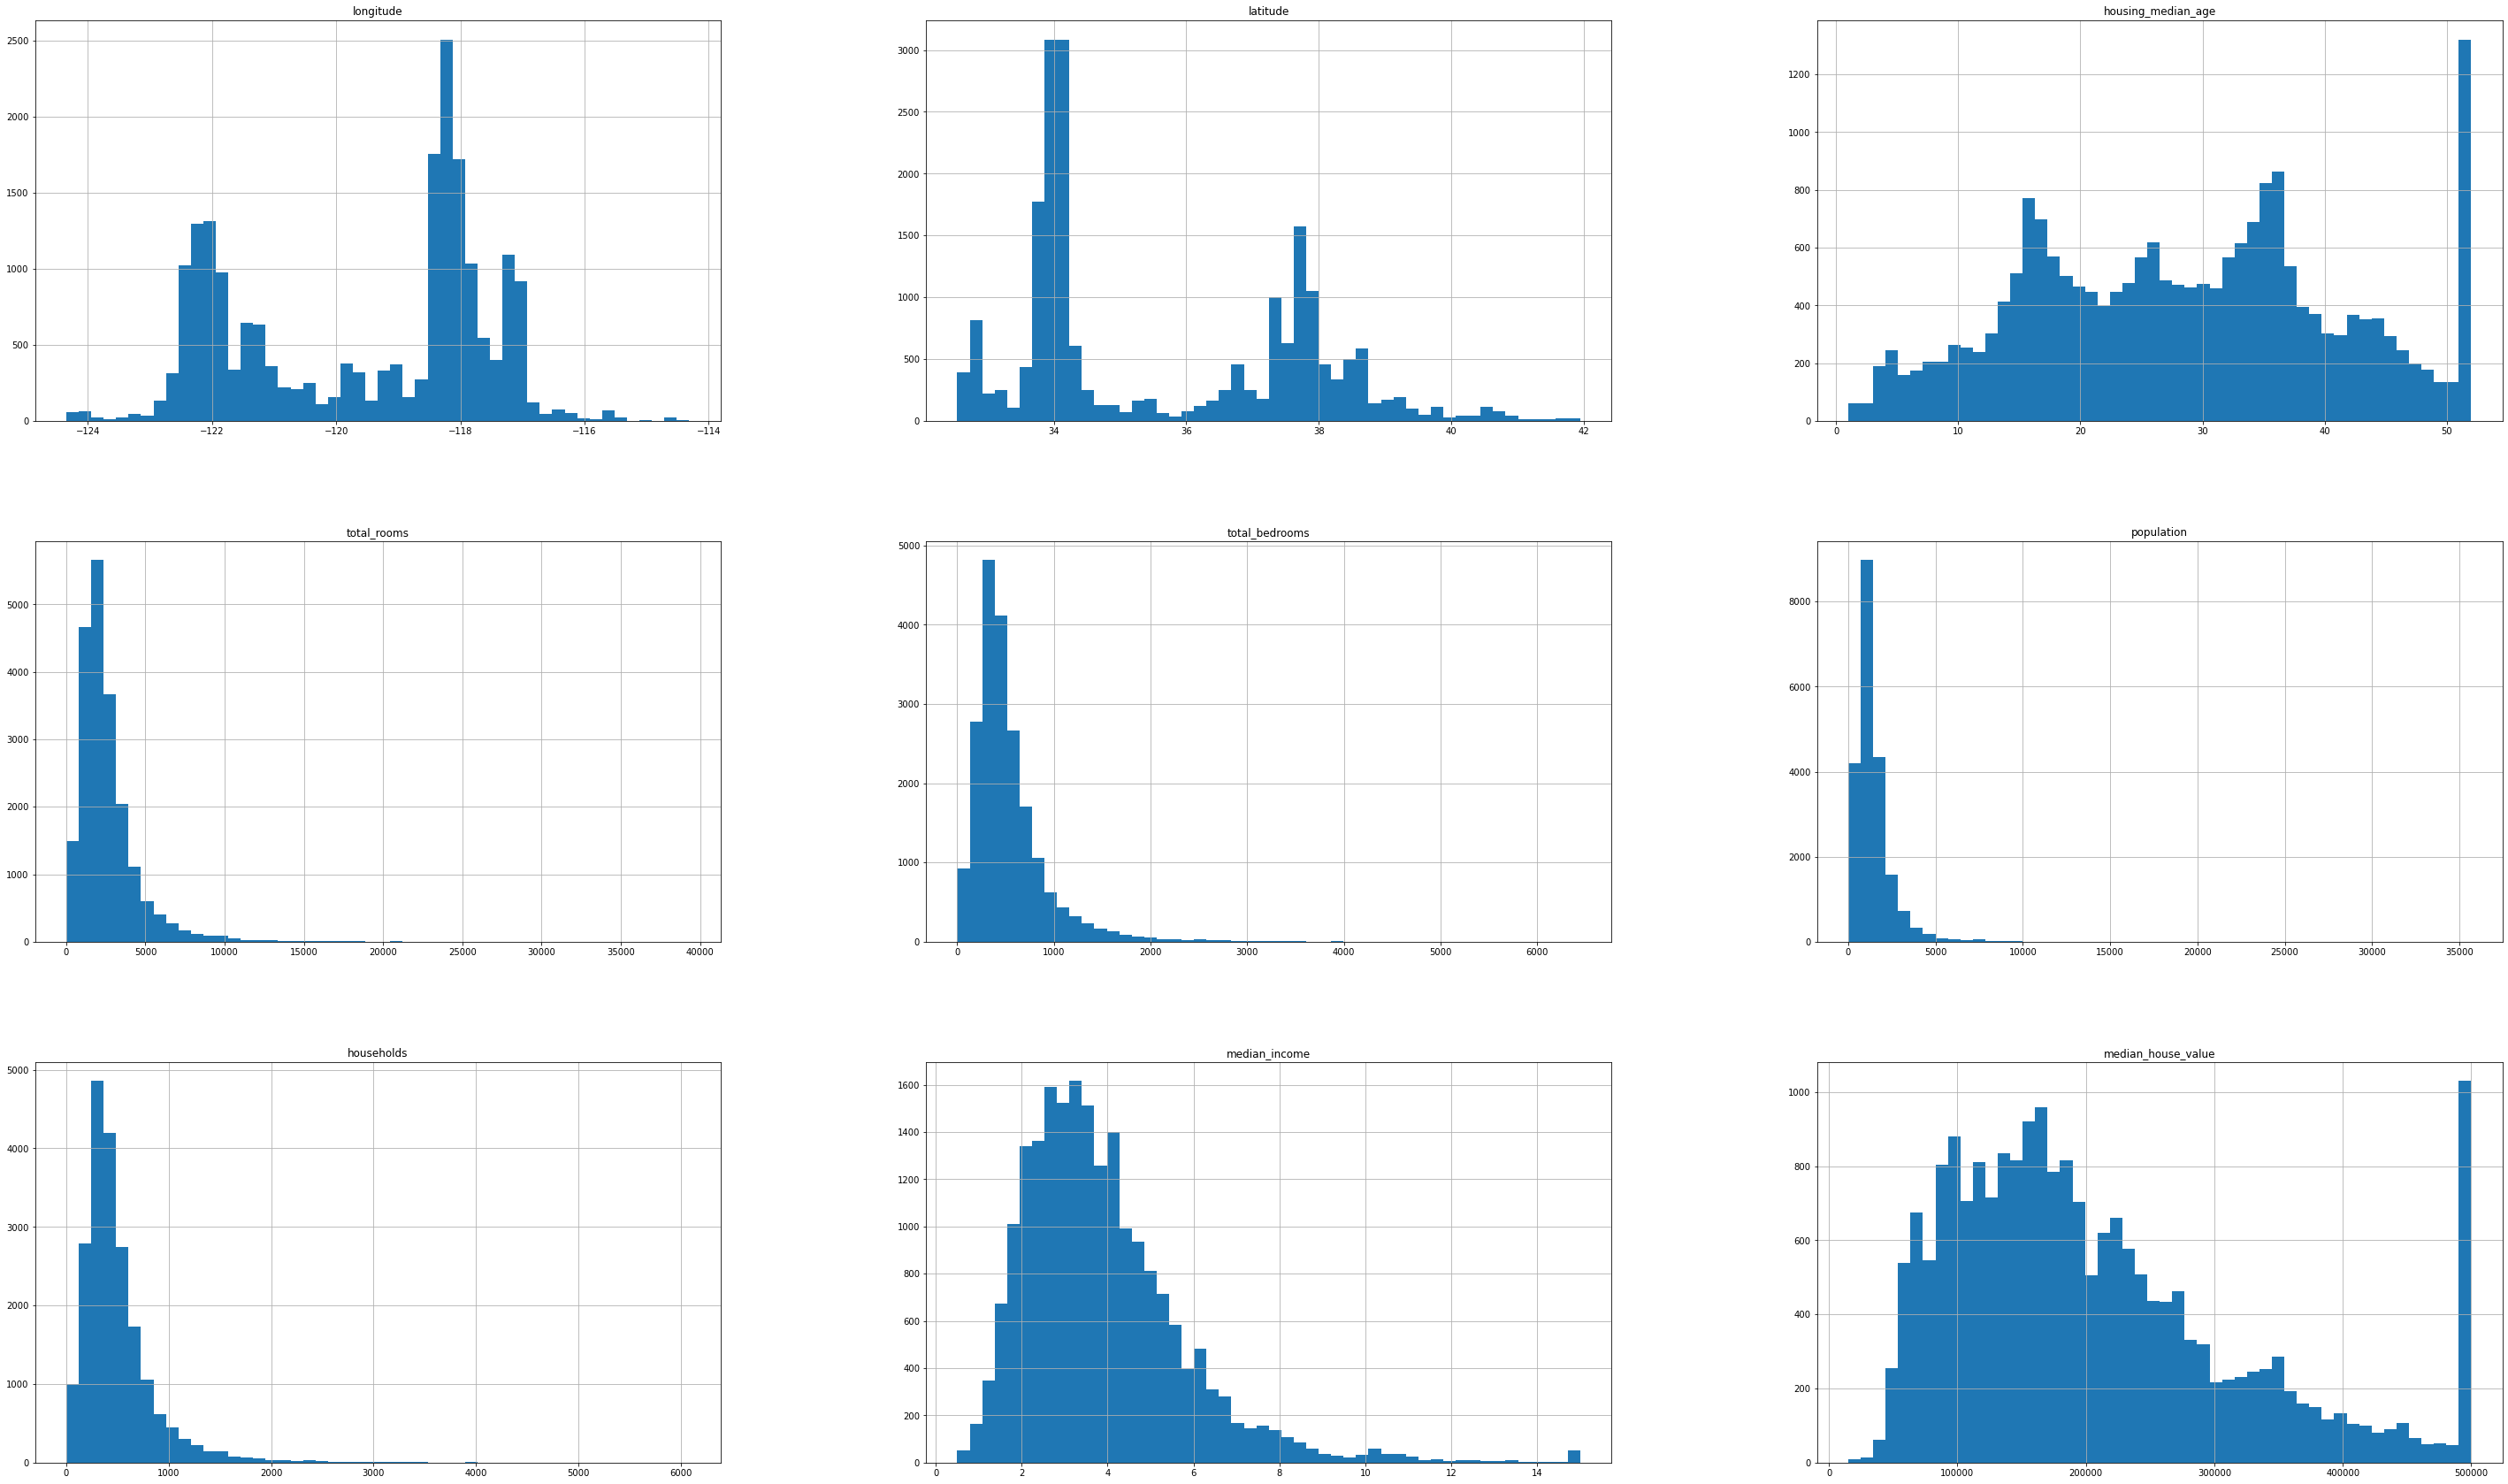

In [19]:
df.hist(bins=50,figsize=(50,30))
plt.show()

In [22]:
train_set,test_set = train_test_split(df,test_size=0.3)

In [28]:
df['income_cat'] = pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

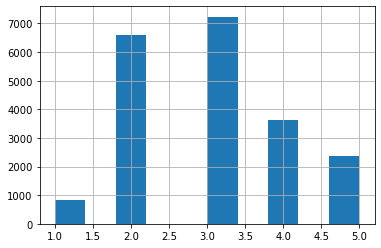

In [29]:
df['income_cat'].hist()

In [35]:
df['income_cat'].value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]>

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

In [38]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [41]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [42]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [45]:
housing = strat_train_set.copy()

In [47]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


No handles with labels found to put in legend.


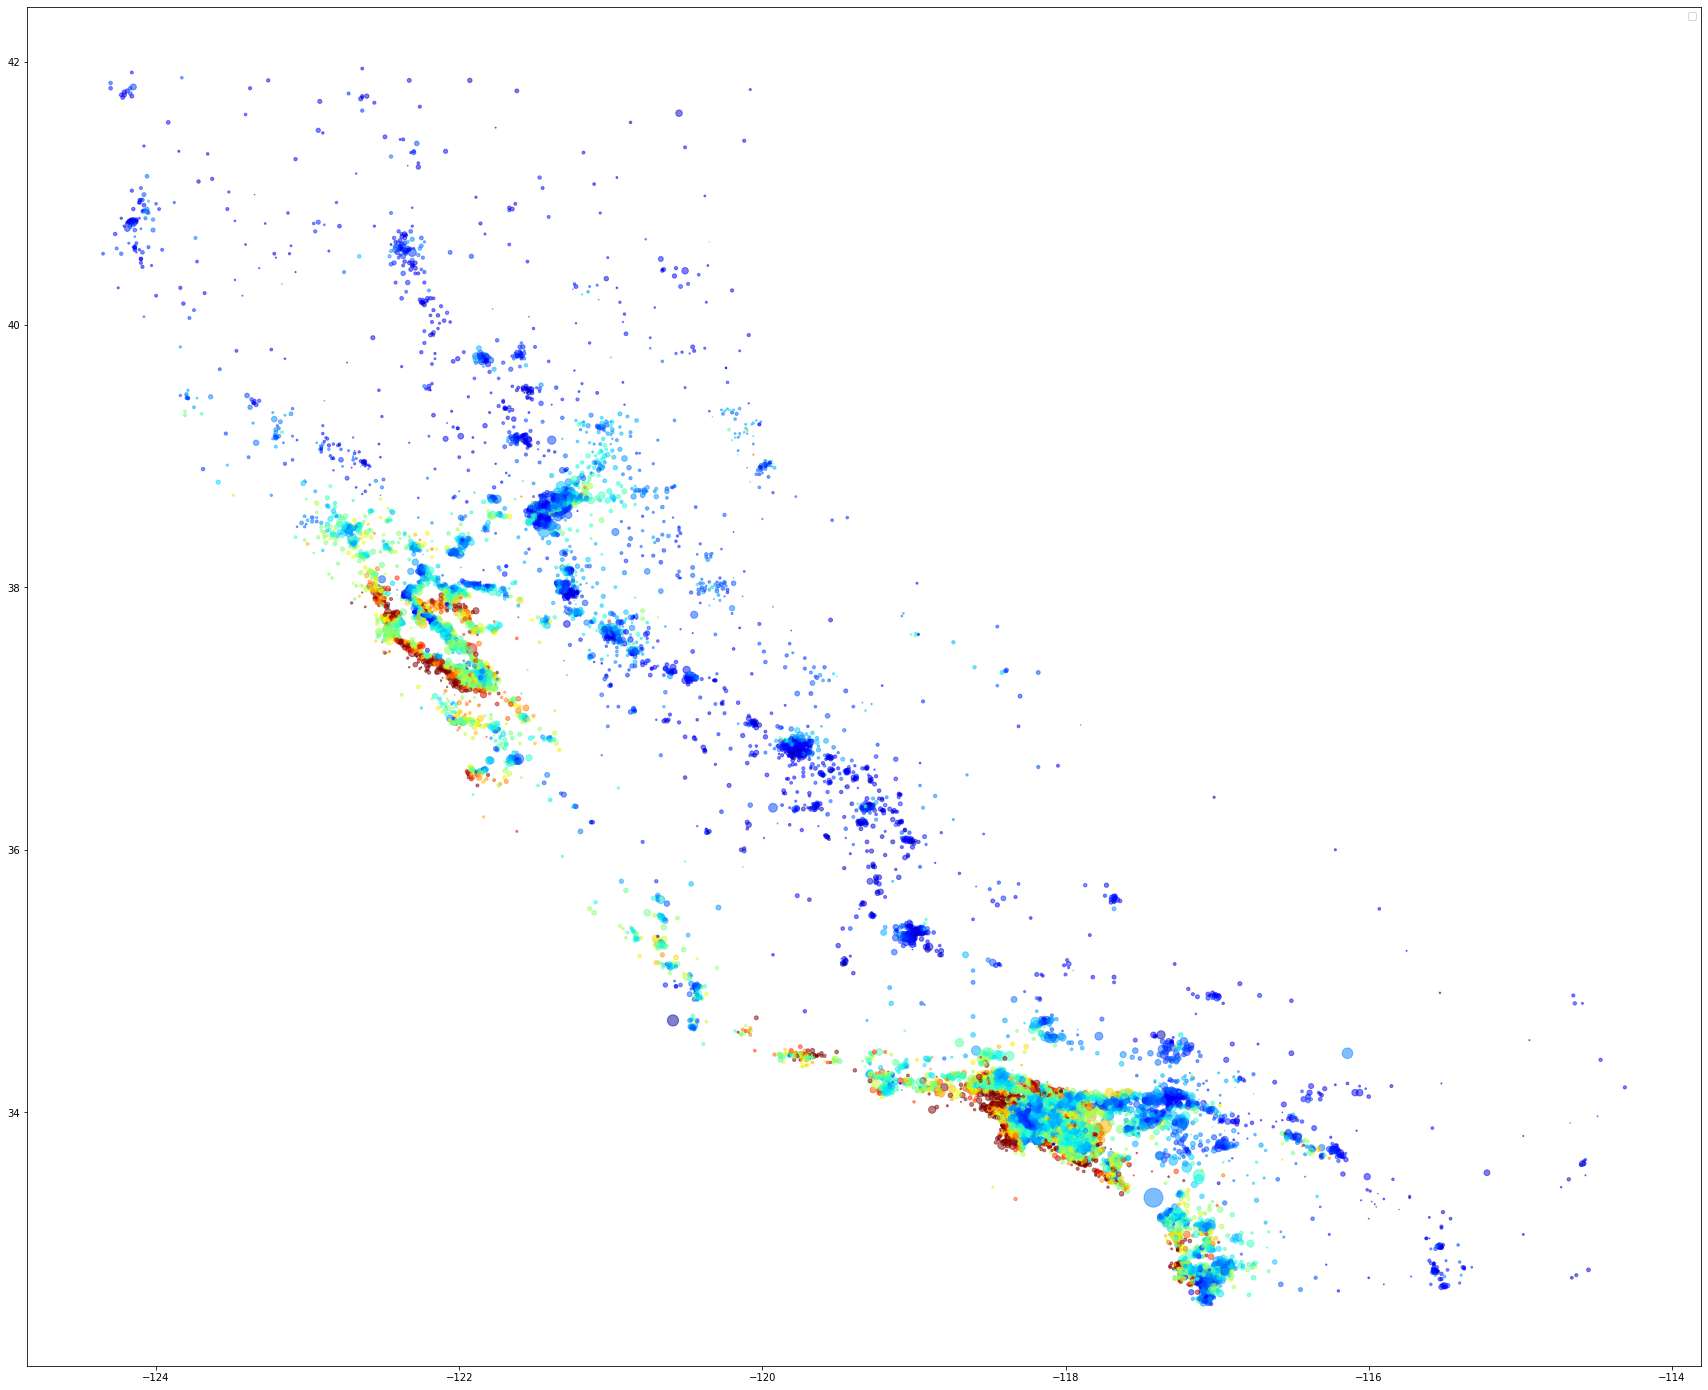

In [63]:
plt.figure(figsize = (30,25))
plt.scatter(x =housing.longitude,y = housing.latitude,s=housing["population"]/100,
            c = housing.median_house_value, alpha=0.5,cmap=plt.get_cmap('jet'))
plt.legend()

In [64]:
corr_matrix = housing.corr()

In [68]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

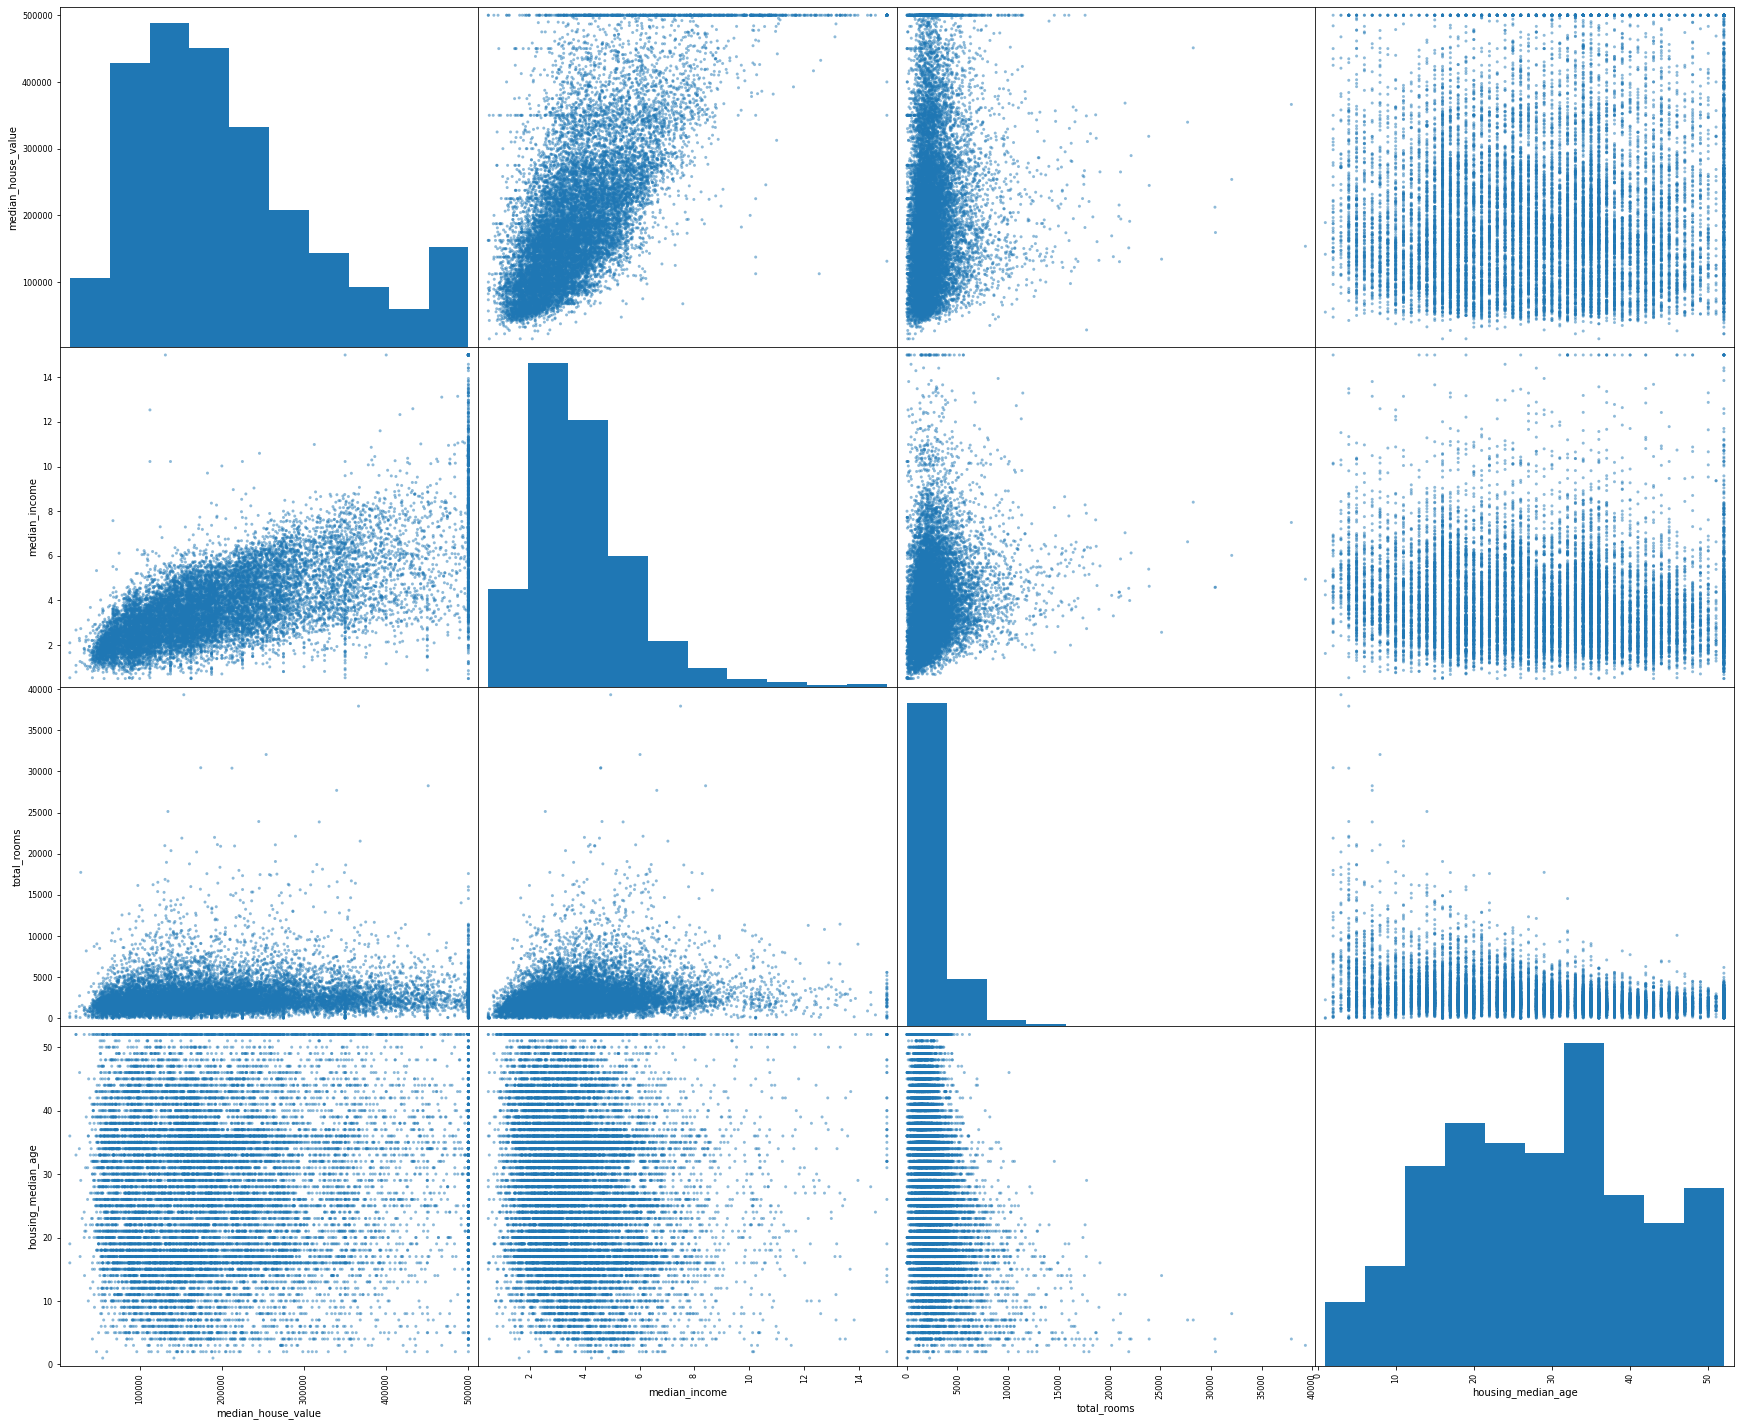

In [73]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(30,25))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

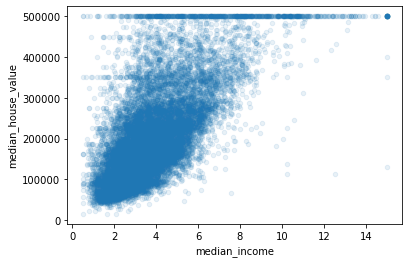

In [77]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [78]:
housing = strat_train_set.drop("median_house_value", axis=1)

In [79]:
housing_labels = strat_train_set["median_house_value"].copy()

In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [81]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [82]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [83]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [84]:
X = imputer.transform(housing_num)

In [85]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [97]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [98]:
housing_cat = housing[['ocean_proximity']]

In [99]:
housing_cat.head(8)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND


In [104]:
from sklearn.preprocessing import OrdinalEncoder

In [105]:
ordinal_encoder = OrdinalEncoder()

In [107]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [109]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [110]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [111]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [112]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [113]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
            attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
            housing_extra_attribs = attr_adder.transform(housing.values)

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [120]:
num_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy="median")),
                ('attribs_adder',CombinedAttributesAdder()),
                ('std_scaler',StandardScaler()),])

In [124]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [137]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [139]:
asd1 = list(housing_num)


In [142]:
housing_num.longitude

17606   -121.89
18632   -121.93
14650   -117.20
3230    -119.61
3555    -118.59
          ...  
6563    -118.13
12053   -117.56
13908   -116.40
11159   -118.01
15775   -122.45
Name: longitude, Length: 16512, dtype: float64

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [145]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [148]:
data1 = lin_reg.predict(some_data_prepared)

In [154]:
print(f"results: {data1}")

results: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
housing_predictions = lin_reg.predict(housing_prepared)

In [157]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


68628.19819848922

In [159]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [160]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [164]:
tree_rmse_scores = np.sqrt(-scores)

In [165]:
print(tree_rmse_scores)

[70670.85316084 65500.40731011 69927.2924073  69486.72042721
 72802.04929803 75127.24175493 70075.35955667 71253.83856862
 75455.07396753 69635.39508743]


In [172]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean:",scores.mean())
    print("Standart deviation:",scores.std()) 

In [173]:
display_scores(tree_rmse_scores)

Scores [70670.85316084 65500.40731011 69927.2924073  69486.72042721
 72802.04929803 75127.24175493 70075.35955667 71253.83856862
 75455.07396753 69635.39508743]
Mean: 70993.42315386725
Standart deviation: 2769.5644469901513


In [174]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)


In [175]:
lin_rmse_scores = np.sqrt(-lin_scores)


In [176]:
display_scores(lin_rmse_scores)

Scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standart deviation: 2731.674001798351
